<a href="https://colab.research.google.com/github/LMehavilla/ConfFiles/blob/main/CuadernosColab/Manualv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-learn
from google.colab import files
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from tabulate import tabulate
from sklearn.tree import plot_tree, export_graphviz
import graphviz 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import numpy as np
from google.colab import drive
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
import plotly.express as px
import glob
import json
import joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 33.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
drive.mount('/content/gdrive',  force_remount=True)

Mounted at /content/gdrive


In [7]:
def plot_tsne(x, timestamp, y, sourceAddress,  title, simbolo=None):
  
# We want to get TSNE embedding with 2 dimensions
  n_components = 2
  #print(n_components)
  tsne = TSNE(n_components)
  print(x.shape)
  tsne_result = tsne.fit_transform(x)
  #print(tsne_result.shape)
  
  #print(tsne_result[2,0], tsne_result[2,1])
  #print(len(tsne_result))

  try2=[]
  for i in range(len(x)):
    dato={}
    dato['tsne_0']=tsne_result[i,0]
    dato['tsne_1']=tsne_result[i,1]
    dato['Zeek']=x[i]
    dato['timestamp']=timestamp[i]
    dato['sourceAddress']=sourceAddress[i]
    try2.append(dato)

  #try2=np.array(try2)
  #y=np.array(y)
  #print(try2.shape)
 # print(y.shape)
  fig = px.scatter(

      try2, x='tsne_0', y='tsne_1', hover_data=['Zeek', 'timestamp', 'sourceAddress'],

      color=y, labels={'color': 'label'}, symbol=simbolo ,
      title=title, width=1500, height=600

  )
  fig.show()

In [ ]:
def evaluar(model, path_file):

  zeek_df=pd.read_json(path_file, lines=True)
  zeek_df.head()

  timelog=[]
  x_test2=[]
  for i in range(len(zeek_df)):
    dato=[zeek_df.iloc[i]['mediaOrigen'], zeek_df.iloc[i]['mediaResp'], 
          zeek_df.iloc[i]['desvOrigen'], zeek_df.iloc[i]['desvResp'], 
          zeek_df.iloc[i]['noceroOrigen'], zeek_df.iloc[i]['noceroResp'], 
          zeek_df.iloc[i]['duration3'], 
          zeek_df.iloc[i]['mediaTime'], zeek_df.iloc[i]['desvTime']]
    x_test2.append(dato)
    timelog.append([zeek_df.iloc[i]['startTime2'], zeek_df.iloc[i]['sourceAddress']])

  x_test2=np.array(x_test2)
  timelog=np.array(timelog)

  y_pred_test2 = model.predict(x_test2)

  values, count = np.unique(y_pred_test2, return_counts=True)
  print('Etiquetas Detectadas: ', values, count)
  print('-----------------------')

  for i in range(len(y_pred_test2)):
    if not ( y_pred_test2[i]=="SB"):
      print(i, y_pred_test2[i])
      print(timelog[i])

# Etiquetas

In [ ]:
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/Label.json", lines=True)

display(df.style.hide_index())

Description,Acronym
Audio Receive,AR
Audio Send,AR
Audio Download,AD
Audio Upload,AU
Text Receive,TR
Text Send,TS
Image or Video o File Receive,MIR
Image or Video o File Send,MIS
File Download,FD
File Upload,FU


# Send receive

In [ ]:
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/result.log", lines=True)

In [ ]:
x=[]
y=[]
timestamp=[]
sourceAddress=[]
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    y.append(df.iloc[i]['Label'])

x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(197, 9)
(197,)


In [ ]:
plot_tsne(x, timestamp, y, sourceAddress, 'send_receive')

(197, 9)


In [ ]:
x_train=x
y_train=y

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
joblib.dump(model, 'model_RF.joblib')
!cp model_RF.joblib "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/model_RF.joblib"

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/was_machine_evalua.log")

Etiquetas Detectadas:  ['R' 'S' 'SB'] [ 7  7 37]
-----------------------
S
['2023-02-22 10:41:52' '192.168.1.9']
R
['2023-02-22 10:41:52' '192.168.1.7']
R
['2023-02-22 10:42:12' '192.168.1.9']
S
['2023-02-22 10:42:11' '192.168.1.7']
R
['2023-02-22 10:42:22' '192.168.1.9']
S
['2023-02-22 10:42:22' '192.168.1.7']
R
['2023-02-22 10:42:37' '192.168.1.9']
S
['2023-02-22 10:42:37' '192.168.1.7']
S
['2023-02-22 10:42:46' '192.168.1.9']
R
['2023-02-22 10:42:47' '192.168.1.7']
S
['2023-02-22 10:43:01' '192.168.1.9']
R
['2023-02-22 10:43:01' '192.168.1.7']
S
['2023-02-22 10:43:12' '192.168.1.9']
R
['2023-02-22 10:43:12' '192.168.1.7']


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/was_machine.log")

Etiquetas Detectadas:  ['R' 'S' 'SB'] [ 6 11 39]
-----------------------
S
['2023-02-22 10:51:37' '192.168.1.7']
S
['2023-02-22 10:51:50' '192.168.1.7']
R
['2023-02-22 10:51:56' '192.168.1.7']
R
['2023-02-22 10:51:58' '192.168.1.7']
S
['2023-02-22 10:52:07' '192.168.1.7']
S
['2023-02-22 10:52:09' '192.168.1.7']
S
['2023-02-22 10:52:18' '192.168.1.7']
R
['2023-02-22 10:52:27' '192.168.1.7']
R
['2023-02-22 10:52:32' '192.168.1.7']
R
['2023-02-22 10:52:34' '192.168.1.7']
S
['2023-02-22 10:54:24' '192.168.1.7']
S
['2023-02-22 10:54:27' '192.168.1.7']
S
['2023-02-22 10:54:40' '192.168.1.7']
S
['2023-02-22 10:54:46' '192.168.1.7']
S
['2023-02-22 10:55:00' '192.168.1.7']
S
['2023-02-22 10:55:05' '192.168.1.7']
R
['2023-02-22 10:55:10' '192.168.1.7']


# Texto o imagen

In [ ]:
x=[]
y=[]
timestamp=[]
sourceAddress=[]

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("TS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("TR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result2.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("IS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("IR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result3.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("IS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("IR")
    else:
      y.append(df.iloc[i]['Label'])

x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(307, 9)
(307,)


In [ ]:
plot_tsne(x, timestamp, y, sourceAddress, 'text_image')

(307, 9)


In [ ]:
x_train=x
y_train=y

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
import joblib

joblib.dump(model, 'model_RF.joblib')
!cp model_RF.joblib "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/model_RF.joblib"

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/was_machine_evalua.log")

solo debe detectar texto
Etiquetas Detectadas:  ['SB' 'TR' 'TS'] [37  7  7]
-----------------------
TS
['2023-02-22 10:41:52' '192.168.1.9']
TR
['2023-02-22 10:41:52' '192.168.1.7']
TR
['2023-02-22 10:42:12' '192.168.1.9']
TS
['2023-02-22 10:42:11' '192.168.1.7']
TR
['2023-02-22 10:42:22' '192.168.1.9']
TS
['2023-02-22 10:42:22' '192.168.1.7']
TR
['2023-02-22 10:42:37' '192.168.1.9']
TS
['2023-02-22 10:42:37' '192.168.1.7']
TS
['2023-02-22 10:42:46' '192.168.1.9']
TR
['2023-02-22 10:42:47' '192.168.1.7']
TS
['2023-02-22 10:43:01' '192.168.1.9']
TR
['2023-02-22 10:43:01' '192.168.1.7']
TS
['2023-02-22 10:43:12' '192.168.1.9']
TR
['2023-02-22 10:43:12' '192.168.1.7']


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/was_machine_evalua.log")

solo debe detectar imagenes
Etiquetas Detectadas:  ['IR' 'IS' 'SB' 'U'] [ 3  4 20  3]
-----------------------
IS
['2023-02-22 11:43:33' '192.168.1.7']
IR
['2023-02-22 11:43:33' '192.168.1.9']
U
['2023-02-22 11:43:32' '192.168.1.7']
IR
['2023-02-22 11:43:45' '192.168.1.9']
IS
['2023-02-22 11:43:45' '192.168.1.7']
IS
['2023-02-22 11:44:03' '192.168.1.9']
IR
['2023-02-22 11:44:12' '192.168.1.7']
IS
['2023-02-22 11:44:12' '192.168.1.9']
U
['2023-02-22 11:44:11' '192.168.1.9']
U
['2023-02-22 11:43:44' '192.168.1.7']


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/was_machine_mix_evalua.log")


Etiquetas Detectadas:  ['IR' 'IS' 'SB' 'TR' 'TS' 'U'] [ 1  2 33  4  5  2]
-----------------------
TS
['2023-02-22 11:52:06' '192.168.1.7']
TR
['2023-02-22 11:52:16' '192.168.1.9']
TS
['2023-02-22 11:52:16' '192.168.1.7']
TR
['2023-02-22 11:52:37' '192.168.1.7']
TS
['2023-02-22 11:52:37' '192.168.1.9']
IS
['2023-02-22 11:52:48' '192.168.1.9']
IR
['2023-02-22 11:52:48' '192.168.1.7']
TR
['2023-02-22 11:52:55' '192.168.1.7']
TS
['2023-02-22 11:52:55' '192.168.1.9']
IS
['2023-02-22 11:53:18' '192.168.1.7']
TS
['2023-02-22 11:53:24' '192.168.1.9']
TR
['2023-02-22 11:53:24' '192.168.1.7']
U
['2023-02-22 11:53:18' '192.168.1.7']
U
['2023-02-22 11:52:47' '192.168.1.9']


El primer mensaje recibido por 9 se ha agrupado con el segundo y la ultima imagen que debe recibir 9 no se muestra porque se ha parado zeek antes de que lo analizase

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/was_machine_videos.log")

se mezcla el envio y recepcion de texto e imagenes con el de videos
Etiquetas Detectadas:  ['IR' 'IS' 'SB' 'TR' 'TS' 'U'] [ 11   9 155  18  12   2]
-----------------------
TS
['2023-02-22 12:00:03' '192.168.1.7']
TR
['2023-02-22 12:00:36' '192.168.1.9']
TS
['2023-02-22 12:00:36' '192.168.1.7']
IS
['2023-02-22 12:01:16' '192.168.1.7']
IR
['2023-02-22 12:01:16' '192.168.1.9']
TR
['2023-02-22 12:01:37' '192.168.1.7']
TR
['2023-02-22 12:01:56' '192.168.1.7']
TS
['2023-02-22 12:01:56' '192.168.1.9']
TR
['2023-02-22 12:02:18' '192.168.1.7']
TS
['2023-02-22 12:02:18' '192.168.1.9']
IS
['2023-02-22 12:02:34' '192.168.1.9']
IR
['2023-02-22 12:02:34' '192.168.1.7']
TR
['2023-02-22 12:02:57' '192.168.1.7']
TS
['2023-02-22 12:02:56' '192.168.1.9']
TS
['2023-02-22 12:03:30' '192.168.1.9']
TR
['2023-02-22 12:03:30' '192.168.1.7']
U
['2023-02-22 12:02:32' '192.168.1.9']
IR
['2023-02-22 12:03:49' '192.168.1.7']
IS
['2023-02-22 12:03:48' '192.168.1.9']
IR
['2023-02-22 12:04:22' '192.168.1.7']
TR
['2023

# Texto o imagen o audio

In [ ]:
x=[]
y=[]
timestamp=[]
sourceAddress=[]

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("TS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("TR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result2.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("IS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("IR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result3.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("IS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("IR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("AS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("AR")
    else:
      y.append(df.iloc[i]['Label'])

x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(449, 9)
(449,)


In [ ]:
plot_tsne(x, timestamp, y, sourceAddress, 'text_image_audio')

(449, 9)


In [ ]:
x_train=x
y_train=y

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
import joblib

joblib.dump(model, 'model_RF.joblib')
!cp model_RF.joblib "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio/model_RF.joblib"

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/was_machine_evalua.log")

solo debe detectar texto
Etiquetas Detectadas:  ['SB' 'TR' 'TS'] [37  7  7]
-----------------------
TS
['2023-02-22 10:41:52' '192.168.1.9']
TR
['2023-02-22 10:41:52' '192.168.1.7']
TR
['2023-02-22 10:42:12' '192.168.1.9']
TS
['2023-02-22 10:42:11' '192.168.1.7']
TR
['2023-02-22 10:42:22' '192.168.1.9']
TS
['2023-02-22 10:42:22' '192.168.1.7']
TR
['2023-02-22 10:42:37' '192.168.1.9']
TS
['2023-02-22 10:42:37' '192.168.1.7']
TS
['2023-02-22 10:42:46' '192.168.1.9']
TR
['2023-02-22 10:42:47' '192.168.1.7']
TS
['2023-02-22 10:43:01' '192.168.1.9']
TR
['2023-02-22 10:43:01' '192.168.1.7']
TS
['2023-02-22 10:43:12' '192.168.1.9']
TR
['2023-02-22 10:43:12' '192.168.1.7']


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/was_machine_evalua.log")

solo debe detectar imagenes
Etiquetas Detectadas:  ['AR' 'D' 'IR' 'IS' 'SB' 'U'] [ 1  1  3  5 16  4]
-----------------------
1 SB
['2023-02-22 11:43:11' '192.168.1.7']
2 SB
['2023-02-22 11:43:12' '192.168.1.7']
3 IS
['2023-02-22 11:43:25' '192.168.1.7']
4 SB
['2023-02-22 11:43:03' '192.168.1.9']
5 IS
['2023-02-22 11:43:33' '192.168.1.7']
6 IR
['2023-02-22 11:43:33' '192.168.1.9']
7 U
['2023-02-22 11:43:32' '192.168.1.7']
8 IR
['2023-02-22 11:43:45' '192.168.1.9']
9 IS
['2023-02-22 11:43:45' '192.168.1.7']
10 SB
['2023-02-22 11:43:50' '192.168.1.9']
11 SB
['2023-02-22 11:43:50' '192.168.1.7']
12 SB
['2023-02-22 11:43:52' '192.168.1.7']
13 SB
['2023-02-22 11:43:51' '192.168.1.9']
14 SB
['2023-02-22 11:44:01' '192.168.1.7']
15 IS
['2023-02-22 11:44:03' '192.168.1.9']
16 SB
['2023-02-22 11:43:25' '192.168.1.7']
17 U
['2023-02-22 11:44:01' '192.168.1.9']
18 SB
['2023-02-22 11:44:04' '192.168.1.9']
19 AR
['2023-02-22 11:44:03' '192.168.1.7']
20 SB
['2023-02-22 11:43:14' '192.168.1.7']
21 IR


Y la primera imagen detectada no existe

El AR detectado realmente es IR, el cual con el modelo de oslo texto e imagen no se detectaba

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio/was_machine_evalua.log")

solo debe detectar audio
Etiquetas Detectadas:  ['AR' 'AS' 'D' 'SB' 'TR' 'U'] [ 3  5  1 29  1  3]
-----------------------
1 SB
['2023-02-23 10:10:37' '192.168.1.7']
2 SB
['2023-02-23 10:10:41' '192.168.1.7']
3 SB
['2023-02-23 10:10:47' '192.168.1.7']
4 SB
['2023-02-23 10:10:54' '192.168.1.9']
5 SB
['2023-02-23 10:10:55' '192.168.1.9']
6 SB
['2023-02-23 10:11:04' '192.168.1.7']
7 SB
['2023-02-23 10:10:57' '192.168.1.9']
8 SB
['2023-02-23 10:11:05' '192.168.1.7']
9 AS
['2023-02-23 10:11:15' '192.168.1.7']
10 SB
['2023-02-23 10:11:16' '192.168.1.7']
11 SB
['2023-02-23 10:11:12' '192.168.1.9']
12 SB
['2023-02-23 10:11:23' '192.168.1.7']
13 SB
['2023-02-23 10:11:01' '192.168.1.9']
14 SB
['2023-02-23 10:11:09' '192.168.1.9']
15 AR
['2023-02-23 10:11:24' '192.168.1.9']
16 SB
['2023-02-23 10:11:25' '192.168.1.9']
17 AS
['2023-02-23 10:11:24' '192.168.1.7']
18 SB
['2023-02-23 10:11:34' '192.168.1.7']
19 U
['2023-02-23 10:11:23' '192.168.1.7']
20 SB
['2023-02-23 10:11:28' '192.168.1.9']
21 SB
['

El primer AS no existe

El TR debería ser AR


# Mas datos

In [ ]:
x=[]
y=[]
timestamp=[]
sourceAddress=[]

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("TS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("TR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result2.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("IS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("IR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result3.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("IS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("IR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("AS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("AR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_imagen.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    y.append(df.iloc[i]['Label'])

      
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_audio.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    y.append(df.iloc[i]['Label'])
    
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(521, 9)
(521,)


In [ ]:
plot_tsne(x, timestamp, y, sourceAddress, 'mas_datos')

(521, 9)


In [ ]:
x_train=x
y_train=y

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
import joblib

joblib.dump(model, 'model_RF.joblib')
!cp model_RF.joblib "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/model_RF.joblib"

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/was_machine_evalua.log")

solo debe detectar texto
Etiquetas Detectadas:  ['SB' 'TR' 'TS'] [37  7  7]
-----------------------
TS
['2023-02-22 10:41:52' '192.168.1.9']
TR
['2023-02-22 10:41:52' '192.168.1.7']
TR
['2023-02-22 10:42:12' '192.168.1.9']
TS
['2023-02-22 10:42:11' '192.168.1.7']
TR
['2023-02-22 10:42:22' '192.168.1.9']
TS
['2023-02-22 10:42:22' '192.168.1.7']
TR
['2023-02-22 10:42:37' '192.168.1.9']
TS
['2023-02-22 10:42:37' '192.168.1.7']
TS
['2023-02-22 10:42:46' '192.168.1.9']
TR
['2023-02-22 10:42:47' '192.168.1.7']
TS
['2023-02-22 10:43:01' '192.168.1.9']
TR
['2023-02-22 10:43:01' '192.168.1.7']
TS
['2023-02-22 10:43:12' '192.168.1.9']
TR
['2023-02-22 10:43:12' '192.168.1.7']


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine.log")

Etiquetas Detectadas:  ['AR' 'AS' 'D' 'IR' 'IS' 'SB' 'TR' 'TS' 'U'] [ 1  1  3  2  2 38  2  2  3]
-----------------------
D
['2023-02-23 10:27:34' '192.168.1.7']
U
['2023-02-23 10:27:44' '192.168.1.7']
IS
['2023-02-23 10:28:09' '192.168.1.7']
IR
['2023-02-23 10:28:09' '192.168.1.9']
TR
['2023-02-23 10:28:16' '192.168.1.9']
TS
['2023-02-23 10:28:16' '192.168.1.7']
U
['2023-02-23 10:28:09' '192.168.1.7']
AS
['2023-02-23 10:28:30' '192.168.1.9']
AR
['2023-02-23 10:28:30' '192.168.1.7']
U
['2023-02-23 10:28:29' '192.168.1.9']
IS
['2023-02-23 10:28:40' '192.168.1.9']
IR
['2023-02-23 10:28:40' '192.168.1.7']
TR
['2023-02-23 10:28:49' '192.168.1.7']
TS
['2023-02-23 10:28:49' '192.168.1.9']
D
['2023-02-23 10:28:30' '192.168.1.7']
D
['2023-02-23 10:28:30' '192.168.1.7']


Faltaría de detectar un audio al principio

# Texto o imagen o audio o video

In [ ]:
x=[]
y=[]
timestamp=[]
sourceAddress=[]

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("TS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("TR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result2.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("IS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("IR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result3.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("IS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("IR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("AS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("AR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_imagen.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    y.append(df.iloc[i]['Label'])

      
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_audio.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    y.append(df.iloc[i]['Label'])
  
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("VS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("VR")
    else:
      y.append(df.iloc[i]['Label'])
  
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(590, 9)
(590,)


In [ ]:
plot_tsne(x, timestamp, y, sourceAddress, 'texto imagen audio video')

(590, 9)


In [ ]:
x_train=x
y_train=y

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
import joblib

joblib.dump(model, 'model_RF.joblib')
!cp model_RF.joblib "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/model_RF.joblib"

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/was_machine_evalua.log")

solo debe detectar texto
Etiquetas Detectadas:  ['D' 'SB' 'TR' 'TS'] [ 1 37  6  7]
-----------------------
TS
['2023-02-22 10:41:52' '192.168.1.9']
TR
['2023-02-22 10:42:12' '192.168.1.9']
TS
['2023-02-22 10:42:11' '192.168.1.7']
TR
['2023-02-22 10:42:22' '192.168.1.9']
TS
['2023-02-22 10:42:22' '192.168.1.7']
TR
['2023-02-22 10:42:37' '192.168.1.9']
TS
['2023-02-22 10:42:37' '192.168.1.7']
TS
['2023-02-22 10:42:46' '192.168.1.9']
TR
['2023-02-22 10:42:47' '192.168.1.7']
TS
['2023-02-22 10:43:01' '192.168.1.9']
TR
['2023-02-22 10:43:01' '192.168.1.7']
TS
['2023-02-22 10:43:12' '192.168.1.9']
TR
['2023-02-22 10:43:12' '192.168.1.7']
D
['2023-02-22 10:43:01' '192.168.1.7']


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine.log")

Etiquetas Detectadas:  ['AR' 'AS' 'D' 'IR' 'IS' 'SB' 'TR' 'TS' 'U' 'VS'] [ 1  1  3  2  1 38  2  2  3  1]
-----------------------
D
['2023-02-23 10:27:34' '192.168.1.7']
U
['2023-02-23 10:27:44' '192.168.1.7']
VS
['2023-02-23 10:28:09' '192.168.1.7']
IR
['2023-02-23 10:28:09' '192.168.1.9']
TR
['2023-02-23 10:28:16' '192.168.1.9']
TS
['2023-02-23 10:28:16' '192.168.1.7']
U
['2023-02-23 10:28:09' '192.168.1.7']
AS
['2023-02-23 10:28:30' '192.168.1.9']
AR
['2023-02-23 10:28:30' '192.168.1.7']
U
['2023-02-23 10:28:29' '192.168.1.9']
IS
['2023-02-23 10:28:40' '192.168.1.9']
IR
['2023-02-23 10:28:40' '192.168.1.7']
TR
['2023-02-23 10:28:49' '192.168.1.7']
TS
['2023-02-23 10:28:49' '192.168.1.9']
D
['2023-02-23 10:28:30' '192.168.1.7']
D
['2023-02-23 10:28:30' '192.168.1.7']


Faltaría de detectar un audio al principio y ha confundido la primera imagen por un video


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/was_machine_evalua.log")

Etiquetas Detectadas:  ['AR' 'AS' 'D' 'IR' 'IS' 'SB' 'TR' 'TS' 'U' 'VS'] [ 2  2  1  4  4 32  2  2  4  1]
-----------------------
IR
['2023-02-23 11:16:32' '192.168.1.9']
IS
['2023-02-23 11:16:32' '192.168.1.7']
IR
['2023-02-23 11:17:42' '192.168.1.7']
IS
['2023-02-23 11:17:42' '192.168.1.9']
U
['2023-02-23 11:17:40' '192.168.1.9']
IS
['2023-02-23 11:18:14' '192.168.1.9']
IR
['2023-02-23 11:18:14' '192.168.1.7']
IR
['2023-02-23 11:18:22' '192.168.1.9']
IS
['2023-02-23 11:18:22' '192.168.1.7']
U
['2023-02-23 11:18:21' '192.168.1.7']
AR
['2023-02-23 11:18:30' '192.168.1.9']
AS
['2023-02-23 11:18:30' '192.168.1.7']
TS
['2023-02-23 11:18:35' '192.168.1.7']
TR
['2023-02-23 11:18:35' '192.168.1.9']
U
['2023-02-23 11:18:13' '192.168.1.9']
U
['2023-02-23 11:18:30' '192.168.1.7']
AS
['2023-02-23 11:18:42' '192.168.1.9']
AR
['2023-02-23 11:18:42' '192.168.1.7']
TS
['2023-02-23 11:18:48' '192.168.1.9']
TR
['2023-02-23 11:18:48' '192.168.1.7']
D
['2023-02-23 11:18:43' '192.168.1.7']
VS
['2023-02-23

Confunde los videos con imagenes, y al final aparece el envio de un video que no existe, sera la subida del audio en realidad


# Texto o audio o video+imagen

In [ ]:
x=[]
y=[]
timestamp=[]
sourceAddress=[]

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("TS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("TR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result2.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result3.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("AS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("AR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("AU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("AD")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_imagen.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="IS"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="IR"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

      
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_audio.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="U"):
      y.append("AU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("AD")
    else:
      y.append(df.iloc[i]['Label'])
  
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("VU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("VD")
    else:
      y.append(df.iloc[i]['Label'])
  
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(590, 9)
(590,)


In [ ]:
plot_tsne(x, timestamp, y, sourceAddress, 'texto imagen audio video')

(590, 9)


In [ ]:
x_train=x
y_train=y

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
import joblib

joblib.dump(model, 'model_RF.joblib')
!cp model_RF.joblib "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/model_RF2.joblib"

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/model_RF2.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/was_machine_evalua.log")

solo debe detectar texto
Etiquetas Detectadas:  ['SB' 'TR' 'TS' 'VD'] [36  7  7  1]
-----------------------
TS
['2023-02-22 10:41:52' '192.168.1.9']
TR
['2023-02-22 10:41:52' '192.168.1.7']
TR
['2023-02-22 10:42:12' '192.168.1.9']
TS
['2023-02-22 10:42:11' '192.168.1.7']
TR
['2023-02-22 10:42:22' '192.168.1.9']
TS
['2023-02-22 10:42:22' '192.168.1.7']
TR
['2023-02-22 10:42:37' '192.168.1.9']
TS
['2023-02-22 10:42:37' '192.168.1.7']
TS
['2023-02-22 10:42:46' '192.168.1.9']
TR
['2023-02-22 10:42:47' '192.168.1.7']
TS
['2023-02-22 10:43:01' '192.168.1.9']
TR
['2023-02-22 10:43:01' '192.168.1.7']
TS
['2023-02-22 10:43:12' '192.168.1.9']
TR
['2023-02-22 10:43:12' '192.168.1.7']
VD
['2023-02-22 10:43:01' '192.168.1.7']


Deteccion de una descarga de video inexistente (deberia ser stand by)

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/model_RF2.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine.log")

Etiquetas Detectadas:  ['AD' 'AR' 'AS' 'AU' 'ID' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS'] [ 1  1  1  2  1  1  2  2 39  2  2]
-----------------------
AU
['2023-02-23 10:27:44' '192.168.1.7']
MIS
['2023-02-23 10:28:09' '192.168.1.7']
MIR
['2023-02-23 10:28:09' '192.168.1.9']
TR
['2023-02-23 10:28:16' '192.168.1.9']
TS
['2023-02-23 10:28:16' '192.168.1.7']
IU
['2023-02-23 10:28:09' '192.168.1.7']
AS
['2023-02-23 10:28:30' '192.168.1.9']
AR
['2023-02-23 10:28:30' '192.168.1.7']
AU
['2023-02-23 10:28:29' '192.168.1.9']
MIS
['2023-02-23 10:28:40' '192.168.1.9']
MIR
['2023-02-23 10:28:40' '192.168.1.7']
TR
['2023-02-23 10:28:49' '192.168.1.7']
TS
['2023-02-23 10:28:49' '192.168.1.9']
AD
['2023-02-23 10:28:30' '192.168.1.7']
ID
['2023-02-23 10:28:30' '192.168.1.7']


Faltaría de detectar la señalizacion de audio al principio, pero aparece la subida de su archvio multimedia


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/model_RF2.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/was_machine_evalua.log")

Etiquetas Detectadas:  ['AR' 'AS' 'AU' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS'] [ 2  2  3  2  5  4 32  2  2]
-----------------------
MIR
['2023-02-23 11:16:32' '192.168.1.9']
MIS
['2023-02-23 11:16:32' '192.168.1.7']
MIR
['2023-02-23 11:17:42' '192.168.1.7']
MIS
['2023-02-23 11:17:42' '192.168.1.9']
IU
['2023-02-23 11:17:40' '192.168.1.9']
MIS
['2023-02-23 11:18:14' '192.168.1.9']
MIR
['2023-02-23 11:18:14' '192.168.1.7']
MIR
['2023-02-23 11:18:22' '192.168.1.9']
MIS
['2023-02-23 11:18:22' '192.168.1.7']
AU
['2023-02-23 11:18:21' '192.168.1.7']
AR
['2023-02-23 11:18:30' '192.168.1.9']
AS
['2023-02-23 11:18:30' '192.168.1.7']
TS
['2023-02-23 11:18:35' '192.168.1.7']
TR
['2023-02-23 11:18:35' '192.168.1.9']
IU
['2023-02-23 11:18:13' '192.168.1.9']
AU
['2023-02-23 11:18:30' '192.168.1.7']
AS
['2023-02-23 11:18:42' '192.168.1.9']
AR
['2023-02-23 11:18:42' '192.168.1.7']
TS
['2023-02-23 11:18:48' '192.168.1.9']
TR
['2023-02-23 11:18:48' '192.168.1.7']
MIR
['2023-02-23 11:18:43' '192.168.1.7']
AU
['

Diferencia sin problema MI (multimedia image) de A (audio). Aunque luego no parece detectar del todo los subidas de imagen o video. 

Aparece al final la recepcion de MIR en el .7, que realmente no existe


# Texto o audio o video+imagen o archivo

In [ ]:
x=[]
y=[]
timestamp=[]
sourceAddress=[]

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("TS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("TR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result2.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result3.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("AS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("AR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("AU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("AD")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_imagen.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="IS"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="IR"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

      
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_audio.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="U"):
      y.append("AU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("AD")
    else:
      y.append(df.iloc[i]['Label'])
  
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("VU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("VD")
    else:
      y.append(df.iloc[i]['Label'])
   
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("FS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("FR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("FU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("FD")
    else:
      y.append(df.iloc[i]['Label'])
  
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(674, 9)
(674,)


In [ ]:
plot_tsne(x, timestamp, y, sourceAddress, 'texto imagen audio video archivo')

(674, 9)


In [ ]:
x_train=x
y_train=y

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
import joblib

joblib.dump(model, 'model_RF.joblib')
!cp model_RF.joblib "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/model_RF.joblib"

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/was_machine_evalua.log")

solo debe detectar texto
Etiquetas Detectadas:  ['SB' 'TR' 'TS' 'VD'] [37  6  7  1]
-----------------------
TS
['2023-02-22 10:41:52' '192.168.1.9']
TR
['2023-02-22 10:42:12' '192.168.1.9']
TS
['2023-02-22 10:42:11' '192.168.1.7']
TR
['2023-02-22 10:42:22' '192.168.1.9']
TS
['2023-02-22 10:42:22' '192.168.1.7']
TR
['2023-02-22 10:42:37' '192.168.1.9']
TS
['2023-02-22 10:42:37' '192.168.1.7']
TS
['2023-02-22 10:42:46' '192.168.1.9']
TR
['2023-02-22 10:42:47' '192.168.1.7']
TS
['2023-02-22 10:43:01' '192.168.1.9']
TR
['2023-02-22 10:43:01' '192.168.1.7']
TS
['2023-02-22 10:43:12' '192.168.1.9']
TR
['2023-02-22 10:43:12' '192.168.1.7']
VD
['2023-02-22 10:43:01' '192.168.1.7']


Deteccion de una descarga de video inexistente (deberia ser stand by)

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine.log")

Etiquetas Detectadas:  ['AD' 'AR' 'AS' 'AU' 'FD' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS'] [ 1  1  1  2  2  1  2  2 38  2  2]
-----------------------
AU
['2023-02-23 10:27:44' '192.168.1.7']
MIS
['2023-02-23 10:28:09' '192.168.1.7']
MIR
['2023-02-23 10:28:09' '192.168.1.9']
TR
['2023-02-23 10:28:16' '192.168.1.9']
TS
['2023-02-23 10:28:16' '192.168.1.7']
IU
['2023-02-23 10:28:09' '192.168.1.7']
AS
['2023-02-23 10:28:30' '192.168.1.9']
AR
['2023-02-23 10:28:30' '192.168.1.7']
AU
['2023-02-23 10:28:29' '192.168.1.9']
MIS
['2023-02-23 10:28:40' '192.168.1.9']
MIR
['2023-02-23 10:28:40' '192.168.1.7']
TR
['2023-02-23 10:28:49' '192.168.1.7']
TS
['2023-02-23 10:28:49' '192.168.1.9']
AD
['2023-02-23 10:28:30' '192.168.1.7']
FD
['2023-02-23 10:28:30' '192.168.1.7']
FD
['2023-02-23 10:27:49' '192.168.1.9']


Faltaría de detectar la señalizacion de audio al principio, pero aparece la subida de su archvio multimedia

Aparecen al final dos descargas de archivos que no existen



In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/was_machine_evalua.log")

Etiquetas Detectadas:  ['AR' 'AS' 'AU' 'FD' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS'] [ 2  2  3  1  2  5  4 31  2  2]
-----------------------
MIR
['2023-02-23 11:16:32' '192.168.1.9']
MIS
['2023-02-23 11:16:32' '192.168.1.7']
MIR
['2023-02-23 11:17:42' '192.168.1.7']
MIS
['2023-02-23 11:17:42' '192.168.1.9']
IU
['2023-02-23 11:17:40' '192.168.1.9']
MIS
['2023-02-23 11:18:14' '192.168.1.9']
MIR
['2023-02-23 11:18:14' '192.168.1.7']
MIR
['2023-02-23 11:18:22' '192.168.1.9']
MIS
['2023-02-23 11:18:22' '192.168.1.7']
AU
['2023-02-23 11:18:21' '192.168.1.7']
AR
['2023-02-23 11:18:30' '192.168.1.9']
AS
['2023-02-23 11:18:30' '192.168.1.7']
TS
['2023-02-23 11:18:35' '192.168.1.7']
TR
['2023-02-23 11:18:35' '192.168.1.9']
IU
['2023-02-23 11:18:13' '192.168.1.9']
AU
['2023-02-23 11:18:30' '192.168.1.7']
AS
['2023-02-23 11:18:42' '192.168.1.9']
AR
['2023-02-23 11:18:42' '192.168.1.7']
TS
['2023-02-23 11:18:48' '192.168.1.9']
TR
['2023-02-23 11:18:48' '192.168.1.7']
MIR
['2023-02-23 11:18:43' '192.168.1.7

Diferencia sin problema MI (multimedia image) de A (audio). Aunque luego no parece detectar del todo los subidas de imagen o video. 

Aparece al final la recepcion de MIR en el .7, que realmente no existe


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/was_machine_evalua.log")

Etiquetas Detectadas:  ['AR' 'AS' 'AU' 'FR' 'FU' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'VU'] [ 1  2  1  1  1  1  1  3 74  1  1]
-----------------------
FU
['2023-02-23 18:08:17' '192.168.1.7']
MIS
['2023-02-23 18:08:18' '192.168.1.7']
IU
['2023-02-23 18:08:38' '192.168.1.7']
MIS
['2023-02-23 18:08:38' '192.168.1.7']
MIR
['2023-02-23 18:08:39' '192.168.1.9']
MIS
['2023-02-23 18:08:52' '192.168.1.7']
VU
['2023-02-23 18:08:50' '192.168.1.7']
FR
['2023-02-23 18:08:52' '192.168.1.9']
AS
['2023-02-23 18:09:04' '192.168.1.7']
AR
['2023-02-23 18:09:04' '192.168.1.9']
AS
['2023-02-23 18:09:09' '192.168.1.7']
AU
['2023-02-23 18:09:03' '192.168.1.7']
TR
['2023-02-23 18:09:10' '192.168.1.9']


El AS de las 18:09:09 es un TS



In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/was_machine.log")

Etiquetas Detectadas:  ['AD' 'AR' 'AS' 'AU' 'FD' 'FR' 'FS' 'FU' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'VU'] [  2   3  10  18   7   7   5   2  14  18  18 195   6   5]
-----------------------
1 SB
2 SB
3 SB
4 SB
5 MIS
6 SB
7 SB
8 SB
9 SB
10 SB
11 AS
12 SB
13 SB
14 SB
15 SB
16 SB
17 SB
18 SB
19 FR
20 SB
21 SB
22 FS
23 SB
24 SB
25 SB
26 SB
27 SB
28 SB
29 SB
30 SB
31 SB
32 SB
33 AU
34 SB
35 AU
36 SB
37 SB
38 MIS
39 SB
40 VU
41 SB
42 SB
43 FD
44 FR
45 SB
46 FS
47 SB
48 SB
49 SB
50 SB
51 SB
52 SB
53 SB
54 SB
55 AS
56 SB
57 SB
58 IU
59 MIS
60 MIR
61 MIR
62 MIS
63 SB
64 VU
65 SB
66 SB
67 SB
68 SB
69 MIR
70 FS
71 AU
72 SB
73 MIR
74 SB
75 MIS
76 SB
77 SB
78 SB
79 SB
80 AS
81 TR
82 SB
83 SB
84 SB
85 SB
86 SB
87 SB
88 SB
89 SB
90 SB
91 SB
92 AS
93 SB
94 SB
95 SB
96 SB
97 FD
98 SB
99 AU
100 SB
101 SB
102 AU
103 SB
104 AU
105 SB
106 MIR
107 MIR
108 SB
109 AU
110 SB
111 SB
112 SB
113 SB
114 SB
115 SB
116 SB
117 SB
118 FD
119 FD
120 FS
121 AR
122 SB
123 SB
124 SB
125 SB
126 SB
127 SB
128 SB
129 SB
130 SB
131 TR
1

# Texto o audio o video+imagen+archivo

In [ ]:
x=[]
y=[]
timestamp=[]
sourceAddress=[]

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("TS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("TR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result2.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result3.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("AS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("AR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("AU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("AD")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_imagen.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="IS"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="IR"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

      
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_audio.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="U"):
      y.append("AU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("AD")
    else:
      y.append(df.iloc[i]['Label'])
  
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("VU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("VD")
    else:
      y.append(df.iloc[i]['Label'])
   
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("FU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("FD")
    else:
      y.append(df.iloc[i]['Label'])
  
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(674, 9)
(674,)


In [ ]:
plot_tsne(x, timestamp, y, sourceAddress, 'texto imagen audio video archivo')

(674, 9)


In [ ]:
x_train=x
y_train=y

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
import joblib

joblib.dump(model, 'model_RF.joblib')
!cp model_RF.joblib "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/model_RF2.joblib"

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/model_RF2.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/was_machine_evalua.log")

solo debe detectar texto
Etiquetas Detectadas:  ['SB' 'TR' 'TS' 'VD'] [36  7  7  1]
-----------------------
TS
['2023-02-22 10:41:52' '192.168.1.9']
TR
['2023-02-22 10:41:52' '192.168.1.7']
TR
['2023-02-22 10:42:12' '192.168.1.9']
TS
['2023-02-22 10:42:11' '192.168.1.7']
TR
['2023-02-22 10:42:22' '192.168.1.9']
TS
['2023-02-22 10:42:22' '192.168.1.7']
TR
['2023-02-22 10:42:37' '192.168.1.9']
TS
['2023-02-22 10:42:37' '192.168.1.7']
TS
['2023-02-22 10:42:46' '192.168.1.9']
TR
['2023-02-22 10:42:47' '192.168.1.7']
TS
['2023-02-22 10:43:01' '192.168.1.9']
TR
['2023-02-22 10:43:01' '192.168.1.7']
TS
['2023-02-22 10:43:12' '192.168.1.9']
TR
['2023-02-22 10:43:12' '192.168.1.7']
VD
['2023-02-22 10:43:01' '192.168.1.7']


Deteccion de una descarga de video inexistente (deberia ser stand by)

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/model_RF2.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine.log")

Etiquetas Detectadas:  ['AD' 'AR' 'AS' 'AU' 'FD' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS'] [ 1  1  1  2  2  1  2  2 38  2  2]
-----------------------
AU
['2023-02-23 10:27:44' '192.168.1.7']
MIS
['2023-02-23 10:28:09' '192.168.1.7']
MIR
['2023-02-23 10:28:09' '192.168.1.9']
TR
['2023-02-23 10:28:16' '192.168.1.9']
TS
['2023-02-23 10:28:16' '192.168.1.7']
IU
['2023-02-23 10:28:09' '192.168.1.7']
AS
['2023-02-23 10:28:30' '192.168.1.9']
AR
['2023-02-23 10:28:30' '192.168.1.7']
AU
['2023-02-23 10:28:29' '192.168.1.9']
MIS
['2023-02-23 10:28:40' '192.168.1.9']
MIR
['2023-02-23 10:28:40' '192.168.1.7']
TR
['2023-02-23 10:28:49' '192.168.1.7']
TS
['2023-02-23 10:28:49' '192.168.1.9']
AD
['2023-02-23 10:28:30' '192.168.1.7']
FD
['2023-02-23 10:28:30' '192.168.1.7']
FD
['2023-02-23 10:27:49' '192.168.1.9']


Faltaría de detectar la señalizacion de audio al principio, pero aparece la subida de su archvio multimedia

Aparecen al final dos descargas de archivos que no existen



In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/model_RF2.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/was_machine_evalua.log")

Etiquetas Detectadas:  ['AR' 'AS' 'AU' 'FD' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS'] [ 1  2  3  1  2  5  4 32  2  2]
-----------------------
MIR
['2023-02-23 11:16:32' '192.168.1.9']
MIS
['2023-02-23 11:16:32' '192.168.1.7']
MIR
['2023-02-23 11:17:42' '192.168.1.7']
MIS
['2023-02-23 11:17:42' '192.168.1.9']
IU
['2023-02-23 11:17:40' '192.168.1.9']
MIS
['2023-02-23 11:18:14' '192.168.1.9']
MIR
['2023-02-23 11:18:14' '192.168.1.7']
MIR
['2023-02-23 11:18:22' '192.168.1.9']
MIS
['2023-02-23 11:18:22' '192.168.1.7']
AU
['2023-02-23 11:18:21' '192.168.1.7']
AR
['2023-02-23 11:18:30' '192.168.1.9']
AS
['2023-02-23 11:18:30' '192.168.1.7']
TS
['2023-02-23 11:18:35' '192.168.1.7']
TR
['2023-02-23 11:18:35' '192.168.1.9']
IU
['2023-02-23 11:18:13' '192.168.1.9']
AU
['2023-02-23 11:18:30' '192.168.1.7']
AS
['2023-02-23 11:18:42' '192.168.1.9']
TS
['2023-02-23 11:18:48' '192.168.1.9']
TR
['2023-02-23 11:18:48' '192.168.1.7']
MIR
['2023-02-23 11:18:43' '192.168.1.7']
AU
['2023-02-23 11:18:42' '192.168.1.9

Diferencia sin problema MI (multimedia image) de A (audio). Aunque luego no parece detectar del todo los subidas de imagen o video. 

Aparece al final la recepcion de MIR en el .7, que realmente no existe


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/model_RF2.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/was_machine_evalua.log")

Etiquetas Detectadas:  ['AR' 'AS' 'AU' 'FD' 'FU' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'VU'] [ 1  1  1  1  1  1  1  4 74  1  1]
-----------------------
FU
['2023-02-23 18:08:17' '192.168.1.7']
MIS
['2023-02-23 18:08:18' '192.168.1.7']
IU
['2023-02-23 18:08:38' '192.168.1.7']
MIS
['2023-02-23 18:08:38' '192.168.1.7']
FD
['2023-02-23 18:08:39' '192.168.1.9']
MIS
['2023-02-23 18:08:52' '192.168.1.7']
VU
['2023-02-23 18:08:50' '192.168.1.7']
MIR
['2023-02-23 18:08:52' '192.168.1.9']
MIS
['2023-02-23 18:09:04' '192.168.1.7']
AR
['2023-02-23 18:09:04' '192.168.1.9']
AS
['2023-02-23 18:09:09' '192.168.1.7']
AU
['2023-02-23 18:09:03' '192.168.1.7']
TR
['2023-02-23 18:09:10' '192.168.1.9']


El MIS de las 18:09:04 en realidad es AS y el AS de las 18:09:09 es un TS


# Mas datos 2

In [ ]:
path ="/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_*.log"
all_files=glob.glob(path)
myfile=open("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result.log", 'w')
for filename in all_files:
    print(filename)
    with open(filename, 'r') as f:
        for line in f:
            json.dump(json.loads(line), myfile)
            myfile.write('\n')

myfile.close()

/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_audio.log
/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_file.log
/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_text.log
/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_video.log
/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_image.log


## Texto o audio o video+imagen o archivo



In [ ]:
x=[]
y=[]
timestamp=[]
sourceAddress=[]

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("TS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("TR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result2.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result3.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("AS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("AR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("AU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("AD")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_imagen.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="IS"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="IR"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

      
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_audio.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="U"):
      y.append("AU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("AD")
    else:
      y.append(df.iloc[i]['Label'])
  
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("VU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("VD")
    else:
      y.append(df.iloc[i]['Label'])
   
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("FS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("FR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("FU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("FD")
    else:
      y.append(df.iloc[i]['Label'])

         
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    y.append(df.iloc[i]['Label'])
  
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(1703, 9)
(1703,)


In [ ]:
plot_tsne(x, timestamp, y, sourceAddress, 'texto imagen audio video archivo')

(1703, 9)


In [ ]:
x_train=x
y_train=y

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
import joblib

joblib.dump(model, 'model_RF.joblib')
!cp model_RF.joblib "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/model_RF_1.joblib"

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/model_RF_1.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/was_machine_evalua.log")

Etiquetas Detectadas:  ['AD' 'SB' 'TR' 'TS'] [ 1 37  6  7]
-----------------------
TS
['2023-02-22 10:41:52' '192.168.1.9']
TR
['2023-02-22 10:42:12' '192.168.1.9']
TS
['2023-02-22 10:42:11' '192.168.1.7']
TR
['2023-02-22 10:42:22' '192.168.1.9']
TS
['2023-02-22 10:42:22' '192.168.1.7']
TR
['2023-02-22 10:42:37' '192.168.1.9']
TS
['2023-02-22 10:42:37' '192.168.1.7']
TS
['2023-02-22 10:42:46' '192.168.1.9']
TR
['2023-02-22 10:42:47' '192.168.1.7']
TS
['2023-02-22 10:43:01' '192.168.1.9']
TR
['2023-02-22 10:43:01' '192.168.1.7']
TS
['2023-02-22 10:43:12' '192.168.1.9']
TR
['2023-02-22 10:43:12' '192.168.1.7']
AD
['2023-02-22 10:43:01' '192.168.1.7']


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/model_RF_1.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine.log")

Etiquetas Detectadas:  ['AD' 'AR' 'AS' 'AU' 'FD' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS'] [ 3  1  1  2  1  1  2  2 36  3  2]
-----------------------
AD
['2023-02-23 10:27:34' '192.168.1.7']
TR
['2023-02-23 10:27:47' '192.168.1.9']
AU
['2023-02-23 10:27:44' '192.168.1.7']
MIS
['2023-02-23 10:28:09' '192.168.1.7']
MIR
['2023-02-23 10:28:09' '192.168.1.9']
TR
['2023-02-23 10:28:16' '192.168.1.9']
TS
['2023-02-23 10:28:16' '192.168.1.7']
IU
['2023-02-23 10:28:09' '192.168.1.7']
AS
['2023-02-23 10:28:30' '192.168.1.9']
AR
['2023-02-23 10:28:30' '192.168.1.7']
AU
['2023-02-23 10:28:29' '192.168.1.9']
MIS
['2023-02-23 10:28:40' '192.168.1.9']
MIR
['2023-02-23 10:28:40' '192.168.1.7']
TR
['2023-02-23 10:28:49' '192.168.1.7']
TS
['2023-02-23 10:28:49' '192.168.1.9']
AD
['2023-02-23 10:28:30' '192.168.1.7']
AD
['2023-02-23 10:28:30' '192.168.1.7']
FD
['2023-02-23 10:27:49' '192.168.1.9']


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/model_RF_1.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/was_machine_evalua.log")

Etiquetas Detectadas:  ['AR' 'AS' 'AU' 'FD' 'FU' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS' 'VS'] [ 2  2  2  1  1  1  5  4 32  1  2  1]
-----------------------
MIR
['2023-02-23 11:16:32' '192.168.1.9']
MIS
['2023-02-23 11:16:32' '192.168.1.7']
MIR
['2023-02-23 11:17:42' '192.168.1.7']
MIS
['2023-02-23 11:17:42' '192.168.1.9']
VS
['2023-02-23 11:17:40' '192.168.1.9']
MIS
['2023-02-23 11:18:14' '192.168.1.9']
MIR
['2023-02-23 11:18:14' '192.168.1.7']
MIR
['2023-02-23 11:18:22' '192.168.1.9']
MIS
['2023-02-23 11:18:22' '192.168.1.7']
AU
['2023-02-23 11:18:21' '192.168.1.7']
AR
['2023-02-23 11:18:30' '192.168.1.9']
AS
['2023-02-23 11:18:30' '192.168.1.7']
TS
['2023-02-23 11:18:35' '192.168.1.7']
TR
['2023-02-23 11:18:35' '192.168.1.9']
IU
['2023-02-23 11:18:13' '192.168.1.9']
AU
['2023-02-23 11:18:30' '192.168.1.7']
AS
['2023-02-23 11:18:42' '192.168.1.9']
AR
['2023-02-23 11:18:42' '192.168.1.7']
TS
['2023-02-23 11:18:48' '192.168.1.9']
MIR
['2023-02-23 11:18:43' '192.168.1.7']
FU
['2023-02-23 11:18:

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/model_RF_1.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/was_machine_evalua.log")

Etiquetas Detectadas:  ['AR' 'AU' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS' 'VS'] [ 1  3  1  3  3 73  1  1  1]
-----------------------
MIR
['2023-02-23 18:08:18' '192.168.1.9']
AU
['2023-02-23 18:08:17' '192.168.1.7']
MIS
['2023-02-23 18:08:18' '192.168.1.7']
IU
['2023-02-23 18:08:38' '192.168.1.7']
AU
['2023-02-23 18:08:38' '192.168.1.7']
MIR
['2023-02-23 18:08:39' '192.168.1.9']
MIS
['2023-02-23 18:08:52' '192.168.1.7']
VS
['2023-02-23 18:08:50' '192.168.1.7']
MIR
['2023-02-23 18:08:52' '192.168.1.9']
MIS
['2023-02-23 18:09:04' '192.168.1.7']
AR
['2023-02-23 18:09:04' '192.168.1.9']
TS
['2023-02-23 18:09:09' '192.168.1.7']
AU
['2023-02-23 18:09:03' '192.168.1.7']
TR
['2023-02-23 18:09:10' '192.168.1.9']


## Texto o audio o video+imagen+archivo

In [ ]:
x=[]
y=[]
timestamp=[]
sourceAddress=[]

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("TS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("TR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result2.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result3.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("AS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("AR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("AU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("AD")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_imagen.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="IS"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="IR"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

      
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_audio.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="U"):
      y.append("AU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("AD")
    else:
      y.append(df.iloc[i]['Label'])
  
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("VU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("VD")
    else:
      y.append(df.iloc[i]['Label'])
   
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("FU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("FD")
    else:
      y.append(df.iloc[i]['Label'])

         
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="FS"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="FR"):
      y.append("MIR")
    else:
      y.append(df.iloc[i]['Label'])
  
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(1703, 9)
(1703,)


In [ ]:
plot_tsne(x, timestamp, y, sourceAddress, 'texto imagen audio video archivo')

(1703, 9)


In [ ]:
x_train=x
y_train=y

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
import joblib

joblib.dump(model, 'model_RF.joblib')
!cp model_RF.joblib "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/model_RF_2.joblib"

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/model_RF_2.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/was_machine_evalua.log")

Etiquetas Detectadas:  ['AD' 'SB' 'TR' 'TS'] [ 1 38  5  7]
-----------------------
TS
['2023-02-22 10:41:52' '192.168.1.9']
TS
['2023-02-22 10:42:11' '192.168.1.7']
TR
['2023-02-22 10:42:22' '192.168.1.9']
TS
['2023-02-22 10:42:22' '192.168.1.7']
TR
['2023-02-22 10:42:37' '192.168.1.9']
TS
['2023-02-22 10:42:37' '192.168.1.7']
TS
['2023-02-22 10:42:46' '192.168.1.9']
TR
['2023-02-22 10:42:47' '192.168.1.7']
TS
['2023-02-22 10:43:01' '192.168.1.9']
TR
['2023-02-22 10:43:01' '192.168.1.7']
TS
['2023-02-22 10:43:12' '192.168.1.9']
TR
['2023-02-22 10:43:12' '192.168.1.7']
AD
['2023-02-22 10:43:01' '192.168.1.7']


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/model_RF_2.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine.log")

Etiquetas Detectadas:  ['AD' 'AR' 'AS' 'AU' 'FD' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS'] [ 3  1  1  2  1  1  2  2 37  2  2]
-----------------------
AD
['2023-02-23 10:27:34' '192.168.1.7']
AU
['2023-02-23 10:27:44' '192.168.1.7']
MIS
['2023-02-23 10:28:09' '192.168.1.7']
MIR
['2023-02-23 10:28:09' '192.168.1.9']
TR
['2023-02-23 10:28:16' '192.168.1.9']
TS
['2023-02-23 10:28:16' '192.168.1.7']
IU
['2023-02-23 10:28:09' '192.168.1.7']
AS
['2023-02-23 10:28:30' '192.168.1.9']
AR
['2023-02-23 10:28:30' '192.168.1.7']
AU
['2023-02-23 10:28:29' '192.168.1.9']
MIS
['2023-02-23 10:28:40' '192.168.1.9']
MIR
['2023-02-23 10:28:40' '192.168.1.7']
TR
['2023-02-23 10:28:49' '192.168.1.7']
TS
['2023-02-23 10:28:49' '192.168.1.9']
AD
['2023-02-23 10:28:30' '192.168.1.7']
AD
['2023-02-23 10:28:30' '192.168.1.7']
FD
['2023-02-23 10:27:49' '192.168.1.9']


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/model_RF_2.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/was_machine_evalua.log")

Etiquetas Detectadas:  ['AR' 'AS' 'AU' 'FD' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS' 'VS'] [ 1  2  2  1  1  5  5 33  1  2  1]
-----------------------
MIR
['2023-02-23 11:16:32' '192.168.1.9']
MIS
['2023-02-23 11:16:32' '192.168.1.7']
MIR
['2023-02-23 11:17:42' '192.168.1.7']
MIS
['2023-02-23 11:17:42' '192.168.1.9']
VS
['2023-02-23 11:17:40' '192.168.1.9']
MIS
['2023-02-23 11:18:14' '192.168.1.9']
MIR
['2023-02-23 11:18:14' '192.168.1.7']
MIR
['2023-02-23 11:18:22' '192.168.1.9']
MIS
['2023-02-23 11:18:22' '192.168.1.7']
AU
['2023-02-23 11:18:21' '192.168.1.7']
AR
['2023-02-23 11:18:30' '192.168.1.9']
AS
['2023-02-23 11:18:30' '192.168.1.7']
TS
['2023-02-23 11:18:35' '192.168.1.7']
TR
['2023-02-23 11:18:35' '192.168.1.9']
IU
['2023-02-23 11:18:13' '192.168.1.9']
AU
['2023-02-23 11:18:30' '192.168.1.7']
AS
['2023-02-23 11:18:42' '192.168.1.9']
TS
['2023-02-23 11:18:48' '192.168.1.9']
MIR
['2023-02-23 11:18:43' '192.168.1.7']
MIS
['2023-02-23 11:18:42' '192.168.1.9']
FD
['2023-02-23 11:18:31' '19

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/model_RF_2.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/was_machine_evalua.log")

Etiquetas Detectadas:  ['AR' 'AU' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS' 'VS'] [ 1  2  1  3  4 73  1  1  1]
-----------------------
MIR
['2023-02-23 18:08:18' '192.168.1.9']
AU
['2023-02-23 18:08:17' '192.168.1.7']
MIS
['2023-02-23 18:08:18' '192.168.1.7']
IU
['2023-02-23 18:08:38' '192.168.1.7']
MIS
['2023-02-23 18:08:38' '192.168.1.7']
MIR
['2023-02-23 18:08:39' '192.168.1.9']
MIS
['2023-02-23 18:08:52' '192.168.1.7']
VS
['2023-02-23 18:08:50' '192.168.1.7']
MIR
['2023-02-23 18:08:52' '192.168.1.9']
MIS
['2023-02-23 18:09:04' '192.168.1.7']
AR
['2023-02-23 18:09:04' '192.168.1.9']
TS
['2023-02-23 18:09:09' '192.168.1.7']
AU
['2023-02-23 18:09:03' '192.168.1.7']
TR
['2023-02-23 18:09:10' '192.168.1.9']


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/model_RF_2.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/tamanos/was_machine.log")

Etiquetas Detectadas:  ['AD' 'AU' 'FU' 'ID' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS'] [  3   1   3   1   4   4   4 111  26  29]
-----------------------
TS
['2023-02-27 18:11:38' '192.168.1.7']
TS
['2023-02-27 18:11:47' '192.168.1.7']
TS
['2023-02-27 18:11:56' '192.168.1.7']
TR
['2023-02-27 18:11:56' '192.168.1.9']
TS
['2023-02-27 18:12:04' '192.168.1.7']
TR
['2023-02-27 18:12:04' '192.168.1.9']
TR
['2023-02-27 18:12:13' '192.168.1.9']
TS
['2023-02-27 18:12:13' '192.168.1.7']
TR
['2023-02-27 18:12:27' '192.168.1.7']
TS
['2023-02-27 18:12:27' '192.168.1.9']
TS
['2023-02-27 18:12:35' '192.168.1.9']
TR
['2023-02-27 18:12:35' '192.168.1.7']
TR
['2023-02-27 18:12:42' '192.168.1.7']
TR
['2023-02-27 18:12:50' '192.168.1.7']
TS
['2023-02-27 18:12:50' '192.168.1.9']
TR
['2023-02-27 18:12:57' '192.168.1.7']
TS
['2023-02-27 18:12:57' '192.168.1.9']
TS
['2023-02-27 18:13:14' '192.168.1.7']
AD
['2023-02-27 18:12:27' '192.168.1.7']
TR
['2023-02-27 18:13:27' '192.168.1.9']
TS
['2023-02-27 18:13:27' '192.168.1.

Parece que no detecta la recepcion de los de menor tamaño (existen en log la traza correspondiente), para ello voy a etiquetar este log y lo voy a subir como datos

#Tamaños en mensajes de texto

## Movil + Ordenador

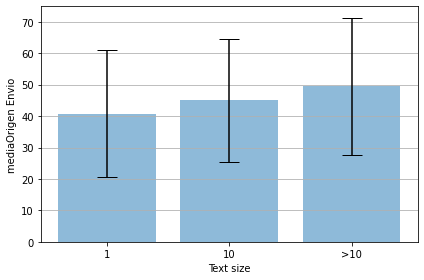

In [ ]:
size_text=["1", "10", ">10"]
bar_val=[40.76, 44.97, 49.50]
des_val=[20.14, 19.64, 21.83]
# Build the plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(size_text)), bar_val, yerr=des_val, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('mediaOrigen Envio')
ax.set_xlabel('Text size')
ax.set_xticks(np.arange(len(size_text)))
ax.set_xticklabels(size_text)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

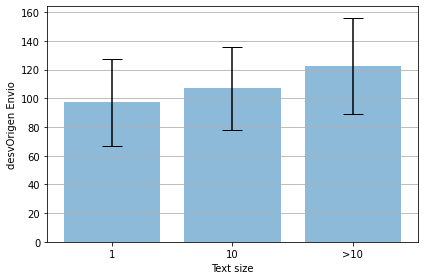

In [ ]:
size_text=["1", "10", ">10"]
bar_val=[97.18, 106.87, 122.57]
des_val=[30.53, 29.10, 33.70]
# Build the plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(size_text)), bar_val, yerr=des_val, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('desvOrigen Envio')
ax.set_xlabel('Text size')
ax.set_xticks(np.arange(len(size_text)))
ax.set_xticklabels(size_text)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

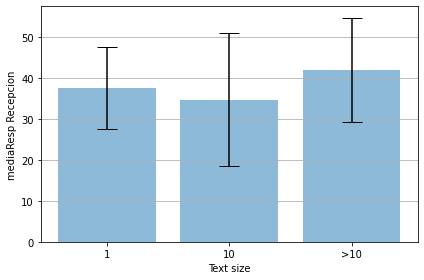

In [ ]:
size_text=["1", "10", ">10"]
bar_val=[37.64, 34.81, 42.03]
des_val=[10.09, 16.20, 12.83]
# Build the plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(size_text)), bar_val, yerr=des_val, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('mediaResp Recepcion')
ax.set_xlabel('Text size')
ax.set_xticks(np.arange(len(size_text)))
ax.set_xticklabels(size_text)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

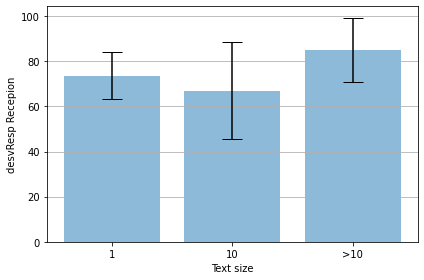

In [ ]:
size_text=["1", "10", ">10"]
bar_val=[73.73, 67.04, 85.11]
des_val=[10.38, 21.67, 14.29]
# Build the plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(size_text)), bar_val, yerr=des_val, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('desvResp Recepion')
ax.set_xlabel('Text size')
ax.set_xticks(np.arange(len(size_text)))
ax.set_xticklabels(size_text)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

## Ordenador

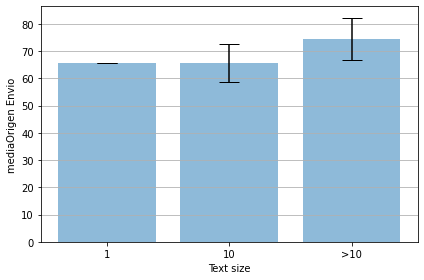

In [ ]:
size_text=["1", "10", ">10"]
bar_val=[65.57, 65.63, 74.61]
des_val=[0, 7.08, 7.73]
# Build the plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(size_text)), bar_val, yerr=des_val, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('mediaOrigen Envio')
ax.set_xlabel('Text size')
ax.set_xticks(np.arange(len(size_text)))
ax.set_xticklabels(size_text)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

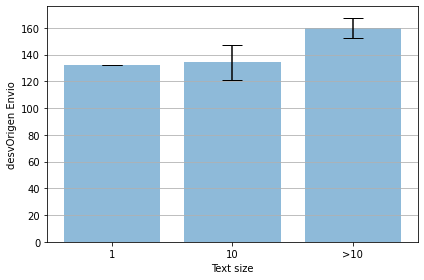

In [ ]:
size_text=["1", "10", ">10"]
bar_val=[131.88, 134.33, 160.00]
des_val=[0, 13.09, 7.69]
# Build the plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(size_text)), bar_val, yerr=des_val, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('desvOrigen Envio')
ax.set_xlabel('Text size')
ax.set_xticks(np.arange(len(size_text)))
ax.set_xticklabels(size_text)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

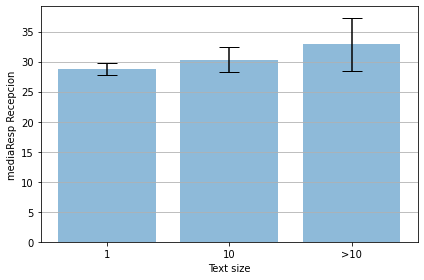

In [ ]:
size_text=["1", "10", ">10"]
bar_val=[28.77, 30.32, 32.90]
des_val=[1.06, 2.12, 4.44]
# Build the plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(size_text)), bar_val, yerr=des_val, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('mediaResp Recepcion')
ax.set_xlabel('Text size')
ax.set_xticks(np.arange(len(size_text)))
ax.set_xticklabels(size_text)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

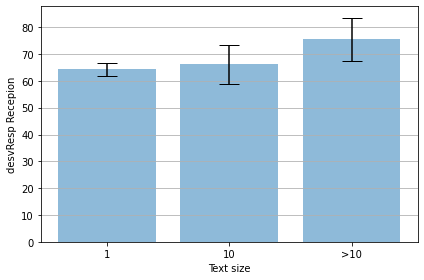

In [ ]:
size_text=["1", "10", ">10"]
bar_val=[64.35, 66.21, 75.55]
des_val=[2.38, 7.21, 8.04]
# Build the plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(size_text)), bar_val, yerr=des_val, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('desvResp Recepion')
ax.set_xlabel('Text size')
ax.set_xticks(np.arange(len(size_text)))
ax.set_xticklabels(size_text)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

## Movil


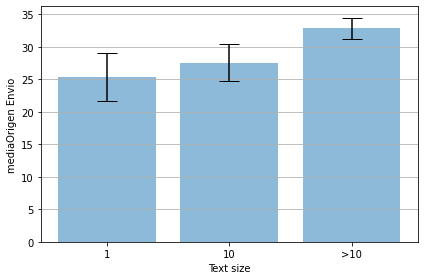

In [ ]:
size_text=["1", "10", ">10"]
bar_val=[25.34, 27.55, 32.83]
des_val=[3.71, 2.88, 1.67]
# Build the plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(size_text)), bar_val, yerr=des_val, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('mediaOrigen Envio')
ax.set_xlabel('Text size')
ax.set_xticks(np.arange(len(size_text)))
ax.set_xticklabels(size_text)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

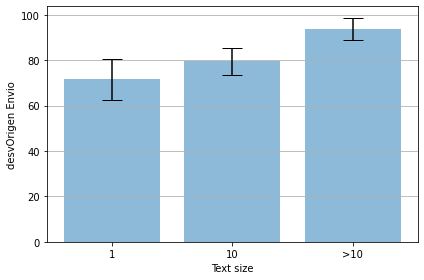

In [ ]:
size_text=["1", "10", ">10"]
bar_val=[71.61, 79.45, 93.90]
des_val=[9.11,  6.11, 4.87]
# Build the plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(size_text)), bar_val, yerr=des_val, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('desvOrigen Envio')
ax.set_xlabel('Text size')
ax.set_xticks(np.arange(len(size_text)))
ax.set_xticklabels(size_text)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

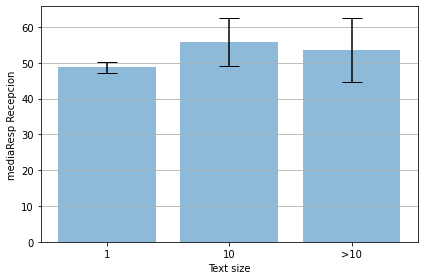

In [ ]:
size_text=["1", "10", ">10"]
bar_val=[48.77, 55.90, 53.68]
des_val=[1.6, 6.71, 8.98]
# Build the plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(size_text)), bar_val, yerr=des_val, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('mediaResp Recepcion')
ax.set_xlabel('Text size')
ax.set_xticks(np.arange(len(size_text)))
ax.set_xticklabels(size_text)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

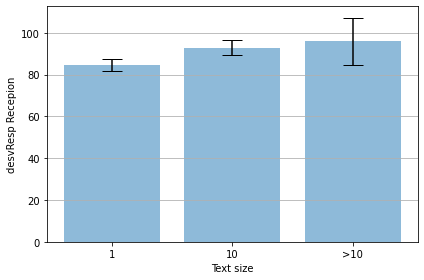

In [ ]:
size_text=["1", "10", ">10"]
bar_val=[84.48, 92.97, 95.88]
des_val=[2.77, 3.66, 11.41]
# Build the plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(size_text)), bar_val, yerr=des_val, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('desvResp Recepion')
ax.set_xlabel('Text size')
ax.set_xticks(np.arange(len(size_text)))
ax.set_xticklabels(size_text)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

#Mas datos 2/ Texto o audio o video+imagen+archivo /+mini textos

In [ ]:
x=[]
y=[]
timestamp=[]
sourceAddress=[]

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("TS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("TR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result2.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result3.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("AS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("AR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("AU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("AD")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_imagen.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="IS"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="IR"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])

      
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_audio.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="U"):
      y.append("AU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("AD")
    else:
      y.append(df.iloc[i]['Label'])
  
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("VU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("VD")
    else:
      y.append(df.iloc[i]['Label'])
   
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("FU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("FD")
    else:
      y.append(df.iloc[i]['Label'])

         
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="FS"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="FR"):
      y.append("MIR")
    else:
      y.append(df.iloc[i]['Label'])
         
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/tamanos/result_minitext.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    y.append(df.iloc[i]['Label'])

x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(1747, 9)
(1747,)


In [ ]:
plot_tsne(x, timestamp, y, sourceAddress, 'texto imagen audio video archivo')

(1747, 9)


In [ ]:
x_train=x
y_train=y

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
import joblib

joblib.dump(model, 'model_RF.joblib')
!cp model_RF.joblib "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/tamanos/model_RF.joblib"

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/tamanos/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/send_receive/was_machine_evalua.log")

Etiquetas Detectadas:  ['AD' 'SB' 'TR' 'TS'] [ 1 36  6  8]
-----------------------
TS
['2023-02-22 10:41:39' '192.168.1.9']
TS
['2023-02-22 10:41:52' '192.168.1.9']
TR
['2023-02-22 10:42:12' '192.168.1.9']
TS
['2023-02-22 10:42:11' '192.168.1.7']
TR
['2023-02-22 10:42:22' '192.168.1.9']
TS
['2023-02-22 10:42:22' '192.168.1.7']
TR
['2023-02-22 10:42:37' '192.168.1.9']
TS
['2023-02-22 10:42:37' '192.168.1.7']
TS
['2023-02-22 10:42:46' '192.168.1.9']
TR
['2023-02-22 10:42:47' '192.168.1.7']
TS
['2023-02-22 10:43:01' '192.168.1.9']
TR
['2023-02-22 10:43:01' '192.168.1.7']
TS
['2023-02-22 10:43:12' '192.168.1.9']
TR
['2023-02-22 10:43:12' '192.168.1.7']
AD
['2023-02-22 10:43:01' '192.168.1.7']


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/tamanos/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine.log")

Etiquetas Detectadas:  ['AD' 'AR' 'AS' 'AU' 'FD' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS'] [ 3  1  1  2  1  1  2  2 37  2  2]
-----------------------
AD
['2023-02-23 10:27:34' '192.168.1.7']
AU
['2023-02-23 10:27:44' '192.168.1.7']
MIS
['2023-02-23 10:28:09' '192.168.1.7']
MIR
['2023-02-23 10:28:09' '192.168.1.9']
TR
['2023-02-23 10:28:16' '192.168.1.9']
TS
['2023-02-23 10:28:16' '192.168.1.7']
IU
['2023-02-23 10:28:09' '192.168.1.7']
AS
['2023-02-23 10:28:30' '192.168.1.9']
AR
['2023-02-23 10:28:30' '192.168.1.7']
AU
['2023-02-23 10:28:29' '192.168.1.9']
MIS
['2023-02-23 10:28:40' '192.168.1.9']
MIR
['2023-02-23 10:28:40' '192.168.1.7']
TR
['2023-02-23 10:28:49' '192.168.1.7']
TS
['2023-02-23 10:28:49' '192.168.1.9']
AD
['2023-02-23 10:28:30' '192.168.1.7']
AD
['2023-02-23 10:28:30' '192.168.1.7']
FD
['2023-02-23 10:27:49' '192.168.1.9']


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/tamanos/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/was_machine_evalua.log")

Etiquetas Detectadas:  ['AR' 'AS' 'AU' 'FD' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS' 'VS'] [ 1  2  3  1  1  5  4 33  1  2  1]
-----------------------
MIR
['2023-02-23 11:16:32' '192.168.1.9']
MIS
['2023-02-23 11:16:32' '192.168.1.7']
MIR
['2023-02-23 11:17:42' '192.168.1.7']
MIS
['2023-02-23 11:17:42' '192.168.1.9']
VS
['2023-02-23 11:17:40' '192.168.1.9']
MIS
['2023-02-23 11:18:14' '192.168.1.9']
MIR
['2023-02-23 11:18:14' '192.168.1.7']
MIR
['2023-02-23 11:18:22' '192.168.1.9']
MIS
['2023-02-23 11:18:22' '192.168.1.7']
AU
['2023-02-23 11:18:21' '192.168.1.7']
AR
['2023-02-23 11:18:30' '192.168.1.9']
AS
['2023-02-23 11:18:30' '192.168.1.7']
TS
['2023-02-23 11:18:35' '192.168.1.7']
TR
['2023-02-23 11:18:35' '192.168.1.9']
IU
['2023-02-23 11:18:13' '192.168.1.9']
AU
['2023-02-23 11:18:30' '192.168.1.7']
AS
['2023-02-23 11:18:42' '192.168.1.9']
TS
['2023-02-23 11:18:48' '192.168.1.9']
MIR
['2023-02-23 11:18:43' '192.168.1.7']
AU
['2023-02-23 11:18:42' '192.168.1.9']
FD
['2023-02-23 11:18:31' '192

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/tamanos/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/was_machine_evalua.log")

Etiquetas Detectadas:  ['AR' 'AU' 'FU' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS' 'VS'] [ 1  1  1  1  3  4 73  1  1  1]
-----------------------
MIR
['2023-02-23 18:08:18' '192.168.1.9']
FU
['2023-02-23 18:08:17' '192.168.1.7']
MIS
['2023-02-23 18:08:18' '192.168.1.7']
IU
['2023-02-23 18:08:38' '192.168.1.7']
MIS
['2023-02-23 18:08:38' '192.168.1.7']
MIR
['2023-02-23 18:08:39' '192.168.1.9']
MIS
['2023-02-23 18:08:52' '192.168.1.7']
VS
['2023-02-23 18:08:50' '192.168.1.7']
MIR
['2023-02-23 18:08:52' '192.168.1.9']
MIS
['2023-02-23 18:09:04' '192.168.1.7']
AR
['2023-02-23 18:09:04' '192.168.1.9']
TS
['2023-02-23 18:09:09' '192.168.1.7']
AU
['2023-02-23 18:09:03' '192.168.1.7']
TR
['2023-02-23 18:09:10' '192.168.1.9']


In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/tamanos/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/tamanos/was_machine_evalua.log")

Etiquetas Detectadas:  ['AR' 'MIS' 'SB' 'TR' 'TS'] [ 1  1 32  6  6]
-----------------------
TR
['2023-02-28 16:55:24' '192.168.1.9']
MIS
['2023-02-28 16:55:24' '192.168.1.7']
AR
['2023-02-28 16:55:26' '192.168.1.9']
TR
['2023-02-28 16:55:30' '192.168.1.9']
TS
['2023-02-28 16:55:29' '192.168.1.7']
TR
['2023-02-28 16:55:45' '192.168.1.7']
TS
['2023-02-28 16:55:45' '192.168.1.9']
TS
['2023-02-28 16:55:51' '192.168.1.7']
TR
['2023-02-28 16:55:51' '192.168.1.9']
TR
['2023-02-28 16:55:55' '192.168.1.9']
TS
['2023-02-28 16:55:55' '192.168.1.7']
TS
['2023-02-28 16:56:01' '192.168.1.9']
TR
['2023-02-28 16:56:01' '192.168.1.7']
TS
['2023-02-28 16:56:07' '192.168.1.9']


## Etiquetado por probabilidad

In [ ]:
zeek_df=pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/tamanos/was_machine_evalua.log", lines=True)
zeek_df.head()

timelog=[]
x_test2=[]
for i in range(len(zeek_df)):
  dato=[zeek_df.iloc[i]['mediaOrigen'], zeek_df.iloc[i]['mediaResp'], 
        zeek_df.iloc[i]['desvOrigen'], zeek_df.iloc[i]['desvResp'], 
        zeek_df.iloc[i]['noceroOrigen'], zeek_df.iloc[i]['noceroResp'], 
        zeek_df.iloc[i]['duration3'], 
        zeek_df.iloc[i]['mediaTime'], zeek_df.iloc[i]['desvTime']]
  x_test2.append(dato)
  timelog.append([zeek_df.iloc[i]['startTime2'], zeek_df.iloc[i]['sourceAddress']])

x_test2=np.array(x_test2)
timelog=np.array(timelog)
y_pred=model.predict(x_test2)
y_test=model.predict_proba(x_test2)
print(model.classes_)
labels=model.classes_
for y in y_test:
  print("------------ ")
  ind_sorted=np.argsort(y)[::-1]
  print(labels[ind_sorted[0]],": ", y[ind_sorted[0]],", ", 
        labels[ind_sorted[1]],": ", y[ind_sorted[1]],", ", 
        labels[ind_sorted[2]],": ", y[ind_sorted[2]],", ", 
        labels[ind_sorted[3]],": ", y[ind_sorted[3]])


['AD' 'AR' 'AS' 'AU' 'FD' 'FU' 'ID' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS' 'VD'
 'VS' 'VU']
------------ 
SB :  0.96 ,  FU :  0.01 ,  FD :  0.01 ,  AS :  0.01
------------ 
SB :  0.98 ,  MIR :  0.01 ,  ID :  0.01 ,  VU :  0.0
------------ 
SB :  0.85 ,  TR :  0.12 ,  AR :  0.02 ,  TS :  0.01
------------ 
SB :  1.0 ,  VU :  0.0 ,  VS :  0.0 ,  VD :  0.0
------------ 
SB :  1.0 ,  VU :  0.0 ,  VS :  0.0 ,  VD :  0.0
------------ 
TR :  0.81 ,  AR :  0.1 ,  SB :  0.07 ,  MIS :  0.01
------------ 
MIS :  0.76 ,  SB :  0.12 ,  AS :  0.11 ,  TS :  0.01
------------ 
AR :  0.56 ,  SB :  0.21 ,  TR :  0.16 ,  MIR :  0.05
------------ 
TR :  0.93 ,  SB :  0.05 ,  MIR :  0.01 ,  AR :  0.01
------------ 
TS :  0.7 ,  SB :  0.14 ,  AS :  0.14 ,  MIS :  0.02
------------ 
SB :  0.95 ,  TS :  0.05 ,  VU :  0.0 ,  VS :  0.0
------------ 
SB :  0.95 ,  TR :  0.02 ,  TS :  0.01 ,  IU :  0.01
------------ 
SB :  1.0 ,  VU :  0.0 ,  VS :  0.0 ,  VD :  0.0
------------ 
SB :  0.99 ,  IU :  0.01 ,  VU :  0.0 ,  

#Mas datos 2/ Texto o audio o video+imagen+archivo /+mini textos +typing

El typing no es que sea algo muy visual. Yo si que veo tramos antes del texto que parecen ser typing. Pero claro, luego llegas a probarlo aqui, y es algo que no influye mucho. Hay veces que si que parece verse, y tampoco es que empeore los resultados, pero si que al final hay fallos entre ello y el stand by


In [ ]:
x=[]
y=[]
timestamp=[]
sourceAddress=[]

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/result_send_receive.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("TS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("TR")
    else:
      y.append(df.iloc[i]['Label'])
    if(df.iloc[i]['Label']=="MIS0"):
      print("1")

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result2.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])
    if(df.iloc[i]['Label']=="MIS0"):
      print("2")

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image/result3.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])
    if(df.iloc[i]['Label']=="MIS0"):
      print("3")

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("AS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("AR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("AU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("AD")
    else:
      y.append(df.iloc[i]['Label'])
    if(df.iloc[i]['Label']=="MIS0"):
      print("4")

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_imagen.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="IS"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="IR"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("IU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("ID")
    else:
      y.append(df.iloc[i]['Label'])
    if(df.iloc[i]['Label']=="MIS0"):
      print("5")

      
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_audio.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="U"):
      y.append("AU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("AD")
    else:
      y.append(df.iloc[i]['Label'])
    if(df.iloc[i]['Label']=="MIS0"):
      print("6")
  
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("VU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("VD")
    else:
      y.append(df.iloc[i]['Label'])
    if(df.iloc[i]['Label']=="MIS0"):
      print("7")
   
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("MIR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("FU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("FD")
    else:
      y.append(df.iloc[i]['Label'])
    if(df.iloc[i]['Label']=="MIS0"):
      print("8")

path ="/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_*.log"
all_files=glob.glob(path)
myfile=open("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/result_mas_datos_2.log", 'w')
for filename in all_files:
  if not (filename=="/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_text.log"):
    print(filename)
    with open(filename, 'r') as f:
        for line in f:
            json.dump(json.loads(line), myfile)
            myfile.write('\n')

myfile.close()
         
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/result_mas_datos_2.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="FS"):
      y.append("MIS")
    elif(df.iloc[i]['Label']=="FR"):
      y.append("MIR")
    else:
      y.append(df.iloc[i]['Label'])
    if(df.iloc[i]['Label']=="MIS0"):
      print("9")
           
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/result_mas_datos_texto.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    y.append(df.iloc[i]['Label'])
    if(df.iloc[i]['Label']=="MIS0"):
      print("10")
         
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/result_minitext_tamanos.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    y.append(df.iloc[i]['Label'])
    if(df.iloc[i]['Label']=="MIS0"):
      print("11")

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/tamanos/result_typing.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    y.append(df.iloc[i]['Label'])
    if(df.iloc[i]['Label']=="MIS0"):
      print("12")

x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_audio.log
/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_file.log
/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_video.log
/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_image.log
(1792, 9)
(1792,)


In [ ]:
plot_tsne(x, timestamp, y, sourceAddress, 'texto imagen audio video archivo typing')

(1792, 9)


El typing si que se puede detectart por lo que parece, pero ahora se me mezcla con los StandBy porque debo revisar todos los logs de texto para determinar el typing a ver si asi se corrige.

Tambien hay que tener en cuenta que si el movil o el ordenador no tienen la app en primer plano parece ser que no se recibe el typing. Además, si los mensajes son consecutivos, aunque somos capaces de partir entre mensajes con la regla de 1 segundo perdemos el typing entre ellos.


In [ ]:
x_train=x
y_train=y

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
import joblib

joblib.dump(model, 'model_RF.joblib')
!cp model_RF.joblib "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/model_RF.joblib"

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine.log")

Etiquetas Detectadas:  ['AD' 'AR' 'AS' 'AU' 'FD' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS' 'typing send'] [ 3  1  1  2  1  1  3  2 34  2  2  2]
-----------------------
AD
['2023-02-23 10:27:34' '192.168.1.7']
AU
['2023-02-23 10:27:44' '192.168.1.7']
MIS
['2023-02-23 10:28:09' '192.168.1.7']
MIR
['2023-02-23 10:28:09' '192.168.1.9']
typing send
['2023-02-23 10:28:12' '192.168.1.7']
TR
['2023-02-23 10:28:16' '192.168.1.9']
TS
['2023-02-23 10:28:16' '192.168.1.7']
MIR
['2023-02-23 10:28:23' '192.168.1.9']
IU
['2023-02-23 10:28:09' '192.168.1.7']
AS
['2023-02-23 10:28:30' '192.168.1.9']
AR
['2023-02-23 10:28:30' '192.168.1.7']
AU
['2023-02-23 10:28:29' '192.168.1.9']
MIS
['2023-02-23 10:28:40' '192.168.1.9']
MIR
['2023-02-23 10:28:40' '192.168.1.7']
typing send
['2023-02-23 10:28:43' '192.168.1.9']
TR
['2023-02-23 10:28:49' '192.168.1.7']
TS
['2023-02-23 10:28:49' '192.168.1.9']
AD
['2023-02-23 10:28:30' '192.168.1.7']
AD
['2023-02-23 10:28:30' '192.168.1.7']
FD
['2023-02-23 10:27:49' '192.168.1.9']

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video/was_machine_evalua.log")

Etiquetas Detectadas:  ['AR' 'AS' 'AU' 'FD' 'FU' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS' 'VS'] [ 2  1  2  1  1  1  5  4 31  2  3  1]
-----------------------
MIR
['2023-02-23 11:16:32' '192.168.1.9']
MIS
['2023-02-23 11:16:32' '192.168.1.7']
MIR
['2023-02-23 11:17:42' '192.168.1.7']
MIS
['2023-02-23 11:17:42' '192.168.1.9']
VS
['2023-02-23 11:17:40' '192.168.1.9']
MIS
['2023-02-23 11:18:14' '192.168.1.9']
MIR
['2023-02-23 11:18:14' '192.168.1.7']
MIR
['2023-02-23 11:18:22' '192.168.1.9']
MIS
['2023-02-23 11:18:22' '192.168.1.7']
AU
['2023-02-23 11:18:21' '192.168.1.7']
AR
['2023-02-23 11:18:30' '192.168.1.9']
AS
['2023-02-23 11:18:30' '192.168.1.7']
TS
['2023-02-23 11:18:35' '192.168.1.7']
TR
['2023-02-23 11:18:35' '192.168.1.9']
IU
['2023-02-23 11:18:13' '192.168.1.9']
AU
['2023-02-23 11:18:30' '192.168.1.7']
TS
['2023-02-23 11:18:42' '192.168.1.9']
AR
['2023-02-23 11:18:42' '192.168.1.7']
TS
['2023-02-23 11:18:48' '192.168.1.9']
TR
['2023-02-23 11:18:48' '192.168.1.7']
MIR
['2023-02-23 11:18:

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio_video_file/was_machine_evalua.log")

Etiquetas Detectadas:  ['AR' 'AS' 'AU' 'FU' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'VS' 'typing send'] [ 1  1  2  1  1  3  3 72  1  1  1]
-----------------------
MIR
['2023-02-23 18:08:18' '192.168.1.9']
FU
['2023-02-23 18:08:17' '192.168.1.7']
MIS
['2023-02-23 18:08:18' '192.168.1.7']
IU
['2023-02-23 18:08:38' '192.168.1.7']
AU
['2023-02-23 18:08:38' '192.168.1.7']
MIR
['2023-02-23 18:08:39' '192.168.1.9']
MIS
['2023-02-23 18:08:52' '192.168.1.7']
VS
['2023-02-23 18:08:50' '192.168.1.7']
typing send
['2023-02-23 18:09:03' '192.168.1.7']
MIR
['2023-02-23 18:08:52' '192.168.1.9']
MIS
['2023-02-23 18:09:04' '192.168.1.7']
AR
['2023-02-23 18:09:04' '192.168.1.9']
AS
['2023-02-23 18:09:09' '192.168.1.7']
AU
['2023-02-23 18:09:03' '192.168.1.7']
TR
['2023-02-23 18:09:10' '192.168.1.9']


## Prueba viendo typing y dejando que se lean los mensajes directamente (en el chat, no salta notificacion)

In [ ]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/model_RF.joblib")
evaluar(model, "/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/was_machine.log")

Etiquetas Detectadas:  ['AR' 'AU' 'FD' 'IU' 'MIR' 'MIS' 'SB' 'TR' 'TS' 'typing receive'
 'typing send'] [ 1  2  3  2  7  7 68  4  7  9 22]
-----------------------
7 typing send
['2023-03-02 10:30:22' '192.168.1.7']
11 AR
['2023-03-02 10:31:10' '192.168.1.9']
12 TS
['2023-03-02 10:31:11' '192.168.1.9']
19 typing send
['2023-03-02 10:32:12' '192.168.1.7']
24 typing send
['2023-03-02 10:32:29' '192.168.1.7']
26 typing send
['2023-03-02 10:32:32' '192.168.1.7']
28 typing send
['2023-03-02 10:32:34' '192.168.1.7']
40 typing send
['2023-03-02 10:34:22' '192.168.1.9']
43 typing send
['2023-03-02 10:34:27' '192.168.1.9']
45 typing send
['2023-03-02 10:34:34' '192.168.1.9']
47 typing send
['2023-03-02 10:34:39' '192.168.1.9']
49 typing send
['2023-03-02 10:34:47' '192.168.1.9']
52 typing send
['2023-03-02 10:34:51' '192.168.1.9']
53 typing receive
['2023-03-02 10:34:51' '192.168.1.7']
54 typing send
['2023-03-02 10:34:56' '192.168.1.9']
55 typing receive
['2023-03-02 10:34:56' '192.168.1.7']
56

# Audio o texto

In [41]:
x=[]
y=[]
timestamp=[]
sourceAddress=[]

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/result_send_receive.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("TS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("TR")
    else:
      y.append(df.iloc[i]['Label'])

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/text_image_audio/result.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="S"):
      y.append("AS")
    elif(df.iloc[i]['Label']=="R"):
      y.append("AR")
    elif(df.iloc[i]['Label']=="U"):
      y.append("AU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("AD")
    else:
      y.append(df.iloc[i]['Label'])
  
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos/was_machine_evalua_audio.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    x.append(dato)
    sourceAddress.append(df.iloc[i]['sourceAddress'])
    timestamp.append(df.iloc[i]['startTime2'])
    if(df.iloc[i]['Label']=="U"):
      y.append("AU")
    elif(df.iloc[i]['Label']=="D"):
      y.append("AD")
    else:
      y.append(df.iloc[i]['Label'])
  
path ="/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_*.log"
all_files=glob.glob(path)
myfile=open("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/result_mas_datos_2.log", 'w')
for filename in all_files:
  if not (filename=="/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_text.log"):
    print(filename)
    with open(filename, 'r') as f:
        for line in f:
            json.dump(json.loads(line), myfile)
            myfile.write('\n')

myfile.close()
         
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/result_mas_datos_2.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    if(df.iloc[i]['Label']=="AS" or df.iloc[i]['Label']=="AR" or df.iloc[i]['Label']=="AU" or df.iloc[i]['Label']=="AD"):
      x.append(dato)
      sourceAddress.append(df.iloc[i]['sourceAddress'])
      timestamp.append(df.iloc[i]['startTime2'])
      y.append(df.iloc[i]['Label'])
    
           
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/result_mas_datos_texto.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    if(df.iloc[i]['Label']=="AS" or df.iloc[i]['Label']=="AR" or df.iloc[i]['Label']=="AU" or df.iloc[i]['Label']=="AD"):
      x.append(dato)
      sourceAddress.append(df.iloc[i]['sourceAddress'])
      timestamp.append(df.iloc[i]['startTime2'])
      y.append(df.iloc[i]['Label'])
    
         
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/result_minitext_tamanos.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    if(df.iloc[i]['Label']=="AS" or df.iloc[i]['Label']=="AR" or df.iloc[i]['Label']=="AU" or df.iloc[i]['Label']=="AD"):
      x.append(dato)
      sourceAddress.append(df.iloc[i]['sourceAddress'])
      timestamp.append(df.iloc[i]['startTime2'])
      y.append(df.iloc[i]['Label'])
    

df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/tamanos/result_typing.log", lines=True)
for i in range(len(df)):
    dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
          df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
          df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
          df.iloc[i]['duration3'], 
          df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
    if(df.iloc[i]['Label']=="AS" or df.iloc[i]['Label']=="AR" or df.iloc[i]['Label']=="AU" or df.iloc[i]['Label']=="AD"):
      x.append(dato)
      sourceAddress.append(df.iloc[i]['sourceAddress'])
      timestamp.append(df.iloc[i]['startTime2'])
      y.append(df.iloc[i]['Label'])


/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_audio.log
/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_file.log
/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_video.log
/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/mas datos 2/result_image.log


In [42]:
print(len(x))
print(len(y))
print(len(timestamp))
print(len(sourceAddress))

504
504
504
504


In [43]:
model=joblib.load("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/tamanos/model_RF.joblib")

x_test2=[]
df = pd.read_json("/content/gdrive/My Drive/Colab Notebooks/WhatsApp/Manual/typing/audio_text.log", lines=True)
for i in range(len(df)):
  dato=[df.iloc[i]['mediaOrigen'], df.iloc[i]['mediaResp'], 
      df.iloc[i]['desvOrigen'], df.iloc[i]['desvResp'], 
      df.iloc[i]['noceroOrigen'], df.iloc[i]['noceroResp'], 
      df.iloc[i]['duration3'], 
      df.iloc[i]['mediaTime'], df.iloc[i]['desvTime']]
  x_test2.append(dato)
  x.append(dato)
  sourceAddress.append(df.iloc[i]['sourceAddress'])
  timestamp.append(df.iloc[i]['startTime2'])

y_pred_test2 = model.predict(x_test2)
for label in y_pred_test2:
  if label=="AS":
    y.append("TS not AS")
  else:
    y.append(label)
x=np.array(x)
y=np.array(y)

values, count = np.unique(y_pred_test2, return_counts=True)
print('Etiquetas Detectadas: ', values, count)
print('-----------------------')

for i in range(len(y_pred_test2)):
  if not ( y_pred_test2[i]=="SB"):
    print(i, y_pred_test2[i])
    print(x_test2[i])

Etiquetas Detectadas:  ['AS' 'MIR' 'SB' 'TS'] [ 13   1 128   4]
-----------------------
25 MIR
[22.083333333333332, 141.33333333333334, 41.81000345478207, 380.31748433235214, 3, 4, 1.356220960617065, 0.688505828380584, 1.889779144187743]
26 AS
[163.45454545454547, 20.90909090909091, 394.4313198970164, 34.487031938118804, 4, 3, 0.35651206970214805, 0.15245853770862902, 0.370717808243394]
36 AS
[212.0, 20.75, 452.11613552272166, 35.97134276059208, 3, 2, 0.21807599067687902, 0.33550614118576, 0.805587085916126]
54 AS
[210.0, 20.75, 452.08516896708744, 35.97134276059208, 3, 2, 0.20407605171203602, 0.17041024565696702, 0.37434306615664903]
58 AS
[164.36363636363637, 22.272727272727273, 395.50066606708026, 36.40701957562807, 4, 3, 1.003897905349731, 0.233706084164706, 0.47396419405250806]
60 AS
[150.0, 19.75, 381.51343357737744, 34.34657916008521, 4, 3, 0.9246079921722411, 0.22167009115219102, 0.48487210402579806]
64 AS
[164.36363636363637, 22.272727272727273, 395.50066606708026, 36.40701957

In [44]:
print(x.shape)
print(y.shape)
print(len(timestamp))
print(len(sourceAddress))

(650, 9)
(650,)
650
650


In [45]:
plot_tsne(x, timestamp, y, sourceAddress, 'text_audio')

(650, 9)
